# Portland Oregon Exploratory Data Analysis

                                        
Are hipster citites safer? Portland is Oregon's largest and most populous city, with the population estimated over half a million. As of late, Portland is best known for its hipster and crunchy behavior, great outdoors, microbreweries, bridges and bicycle paths. Oregon is an in-migration state and Portland leads Oregon's population growth at the rate around 10,000 per year. As this trend is expected to continue for the next five decades, it is worth the effort to explore the crime rate in this city.                             



#### Objective: Understanding the data and answering the questions below:

  - Which is the more frequently committed crime?
  - Which main subject of crimes (property vs. people vs. society) is most prevalent?
  - What is the crime distributions in wealthy vs. ghetto neighborhoods?
  - What time of the day is a crime more likely being committed? 
  - Is there a seasonal trend to crimes?
  
#### Here are the descriptions for some of the columns:

#####  Data Dictionary (2015 - 2018):

* Occur Month Year - The Month and Year that the incident occured.
* Neighborhood - Neighborhood where incident occurred.
* Crime Against - Crime against category (Person, Property, or Society)
* Offense Type - Type of offense (for example, Aggravated Assault)
* Offense Category - Category of offense (for example, Assault Offenses)
* Offense Count - Number of the offense type to count for the incident.

#### Source:

City of Portland Police Bureau 2015-2018 [link](https://www.kaggle.com/katzwigmore/portland-oregon-crime-data)
  

### Let's first take a look at the data set:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
crimes = pd.read_csv('Portland_OR_Crime_Open_Data_Sheet_data.csv')
crimes.head(5)

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,3600 BLOCK OF SE KNAPP ST,17-902332,Property,Eastmoreland,1,2/20/2017,2/1/2017,0,Larceny Offenses,1,Theft From Motor Vehicle,45.470545,-122.625298,7656952.0,664817.0,2/20/2017,Feb-17
1,3600 BLOCK OF SE LAMBERT ST,17-902346,Property,Eastmoreland,1,2/20/2017,2/1/2017,30,Larceny Offenses,1,Theft From Motor Vehicle,45.467028,-122.625272,7656925.0,663535.0,2/20/2017,Feb-17
2,7200 BLOCK OF SE 32ND AVE,17-902450,Property,Eastmoreland,1,2/21/2017,2/1/2017,2345,Larceny Offenses,1,Theft From Motor Vehicle,45.471859,-122.630327,7655675.0,665330.0,2/22/2017,Feb-17
3,6500 BLOCK OF SE 32ND AVE,17-902495,Property,Eastmoreland,1,2/21/2017,2/1/2017,2350,Larceny Offenses,1,Theft From Motor Vehicle,45.475196,-122.630444,7655677.0,666547.0,2/22/2017,Feb-17
4,500 BLOCK OF N DIXON ST,17-901848,Property,Eliot,1,12/21/2016,12/1/2016,1330,Larceny Offenses,1,Theft From Motor Vehicle,45.534551,-122.671730,7645672.0,688462.0,2/11/2017,Feb-17


## Data Cleaning 


There are a few columns we don't need to pay attention to and some that might impose challenges to work with. Let's do some housekeeping before moving on to further analyses.

In [3]:
#make a list of unwanted columns
drop_columns = ['Address', 'Case Number', 'Occur Month Year','OpenDataLat', 'OpenDataLon', 'OpenDataX', 'OpenDataY', 'Report Date', 'ReportMonthYear']

#drop unwanted columns from dateframe 
crimes.drop(drop_columns, inplace=True, axis=1)

crimes.dtypes

Crime Against        object
Neighborhood         object
Number of Records     int64
Occur Date           object
Occur Time            int64
Offense Category     object
Offense Count         int64
Offense Type         object
dtype: object

'Occur Time' values are int64. We need to change it into useable data.

In [4]:
#make a function that can turn time values into strings with a desired format
def int_to_strtime(d):
    (h, s) = (d[:2], d[2:])
    timestr = h + ':' + s
    return timestr 

#add zeros to form hhmm
crimes['Occur Time'] = crimes['Occur Time'].apply('{:0>4}'.format) #what does '{:0>4}' mean? 
crimes['Occur Time'] = crimes['Occur Time'].apply(int_to_strtime)
crimes['Time'] = pd.to_datetime(crimes['Occur Time']).dt.hour
crimes.head()

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time
0,Property,Eastmoreland,1,2/20/2017,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0
1,Property,Eastmoreland,1,2/20/2017,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0
2,Property,Eastmoreland,1,2/21/2017,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23
3,Property,Eastmoreland,1,2/21/2017,23:50,Larceny Offenses,1,Theft From Motor Vehicle,23
4,Property,Eliot,1,12/21/2016,13:30,Larceny Offenses,1,Theft From Motor Vehicle,13


In [5]:
crimes['Occur Date Time'] = pd.to_datetime(crimes['Occur Date'] + ' ' + crimes['Occur Time'])
crimes.head(3)

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time,Occur Date Time
0,Property,Eastmoreland,1,2/20/2017,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:00:00
1,Property,Eastmoreland,1,2/20/2017,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:30:00
2,Property,Eastmoreland,1,2/21/2017,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:45:00


Make new columns named 'Month' and 'Year' to analyze data easier. 

In [6]:
crimes['Occur Date'] = pd.to_datetime(crimes['Occur Date'])
crimes['Year'], crimes['Month'] = crimes['Occur Date'].dt.year, crimes['Occur Date'].dt.month
crimes['Day'] = crimes['Occur Date'].dt.dayofweek #Monday= 0, Sunday=6
crimes['Month Year'] = crimes['Occur Date'].dt.to_period('M')
crimes.head()

,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Time,Offense Category,Offense Count,Offense Type,Time,Occur Date Time,Year,Month,Day,Month Year
0,Property,Eastmoreland,1,2017-02-20,00:00,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:00:00,2017,2,0,2017-02
1,Property,Eastmoreland,1,2017-02-20,00:30,Larceny Offenses,1,Theft From Motor Vehicle,0,2017-02-20 00:30:00,2017,2,0,2017-02
2,Property,Eastmoreland,1,2017-02-21,23:45,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:45:00,2017,2,1,2017-02
3,Property,Eastmoreland,1,2017-02-21,23:50,Larceny Offenses,1,Theft From Motor Vehicle,23,2017-02-21 23:50:00,2017,2,1,2017-02
4,Property,Eliot,1,2016-12-21,13:30,Larceny Offenses,1,Theft From Motor Vehicle,13,2016-12-21 13:30:00,2016,12,2,2016-12


The dataset author mentions that he is still working on the pre-2015 data because the older format isn't comparable to the newer ones. Let's first take a look at the 'Year' column values: 

In [7]:
crimes['Year'].value_counts()

2017    60486
2016    57542
2018    45014
2015    38739
2014      307
2013      126
2012       80
2011       59
2010       41
2009       27
2008       25
2006       21
2007       15
2005       15
2000        8
2002        7
2004        5
1996        5
1998        5
2001        4
2003        3
1999        2
1995        2
1993        2
1984        2
1977        2
1997        1
1994        1
1992        1
1988        1
1987        1
1980        1
1979        1
1972        1
Name: Year, dtype: int64

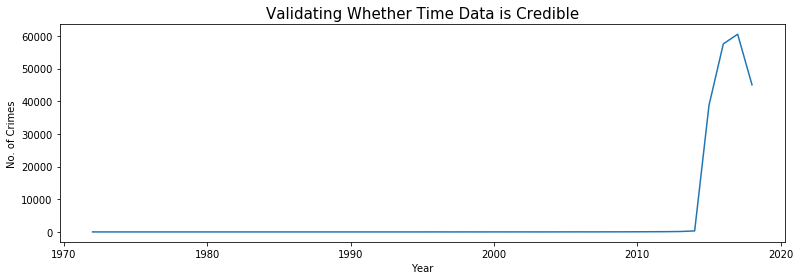

In [58]:
%matplotlib inline
plt.figure(figsize=(13, 4))
plt.plot(crimes['Year'].value_counts().sort_index())
plt.ylabel('No. of Crimes')
plt.xlabel('Year')
plt.title('Validating Whether Time Data is Credible', fontsize=15)
plt.show()

Given that there is a sharp drop to the pre-2015 data. We will focus on post-2015 data only and to do that, we will first create a new data frame containing all the values from 2015 to 2017.

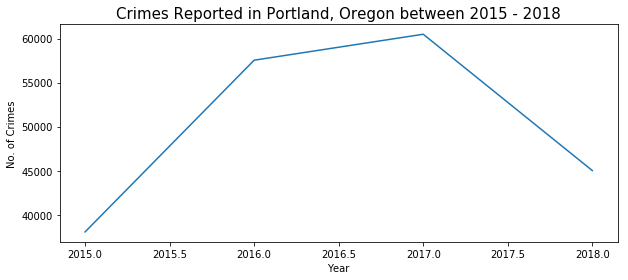

In [9]:
#create a new dataframe containing values between May,2015 - Sept,2018 only
new_year = crimes[crimes['Year'].between(2015, 2018)]
new_year = new_year.set_index('Occur Date')
new_year = new_year['2015-05-01':'2018-09-30']

plt.figure(figsize=(10,4))
plt.plot(new_year['Year'].value_counts().sort_index())
plt.title('Crimes Reported in Portland, Oregon between 2015 - 2018', fontsize=15)
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.show()

## Data Analyses


The overall crime rates went up steadily from 2015 to 2017, then dropped by 25% in 2018. Let's take a look at the crime rates by months to see if there is a distinctive season when crimes most likely to happen.

### Crime Distribution over Time

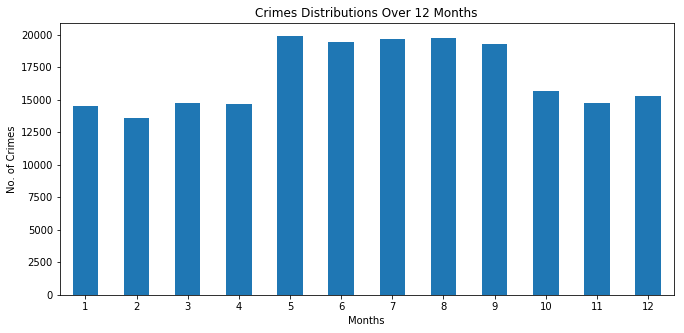

In [24]:
new_year['Month'].value_counts().sort_index().plot(kind='bar', x='Month', title='Crimes Distributions Over 12 Months', figsize=(11,5), rot=0)
plt.xlabel('Months')
plt.ylabel('No. of Crimes')
plt.show()

Crime rates spike in the summer, between May and September. Some researchers reason that increased temperatures- which encourage people to spend more time outdoor and to leave their homes' windows open- and increased daylight hours- which can lengthen the amount of time people spend away from homes- raise the amount of people in pulic and the amount of time that homes are left vacant. 


#### Crime Subjects:

There are 3 types of crime subjects: 

   * **Property**: the object, e.g., robbery, burglary, is to obtain money, property, or some other benefit.
   
    
   * **Society**: the object, e.g., gambling, prostitution, and drug violations, represent society’s prohibition against engaging in certain types of activity and are typically victimless crimes. 
   
    
   * **Person**: the object, e.g., murder, rape, and assault, are those in which the victims are always individuals. 
    

Let's take a look to see which one is the most prevalent. Since the 'Crime Against' category is a nominal distribution, pie chart will be used:

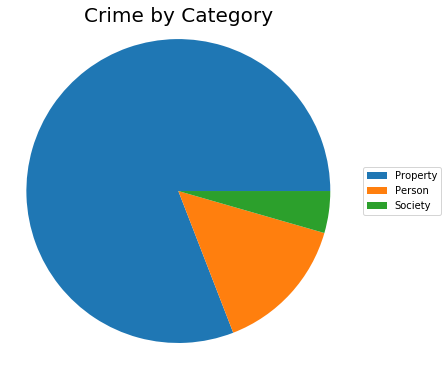

In [25]:
#pie chart

subjects_counts = pd.DataFrame(new_year['Crime Against'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(subjects_counts['Crime Against'])
plt.title('Crime by Category', fontsize=20)
plt.axis('equal')
plt.legend(subjects_counts.index, bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()

Property crime is the most committed type. 


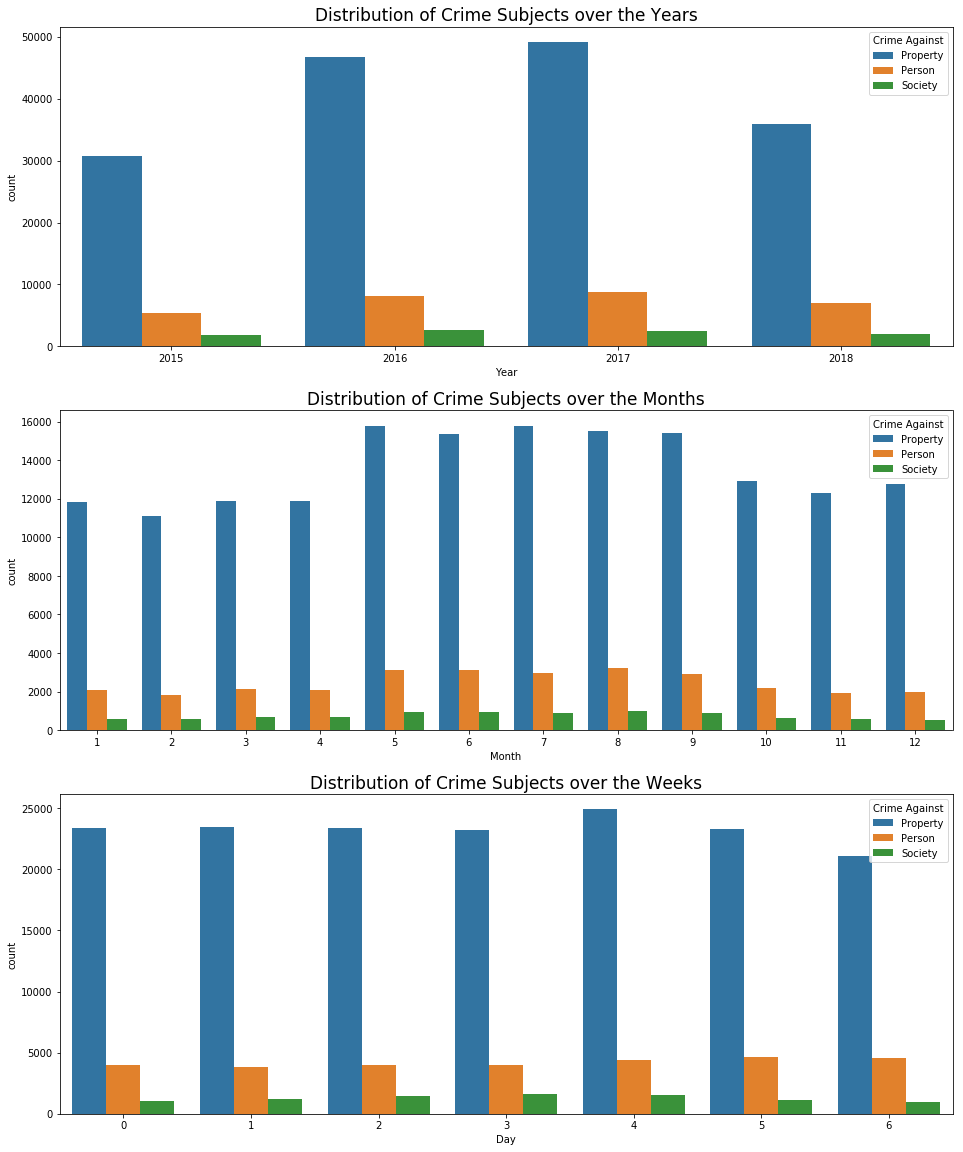

In [26]:
from matplotlib.pyplot import subplot, figure

plt.figure (figsize=(16,20))

#over the years
plt.subplot(3,1,1)
sns.countplot(x=new_year['Year'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Years', fontsize=17)

#over 12 months
plt.subplot(3,1,2)
sns.countplot(x=new_year['Month'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Months', fontsize=17)

#over 7 days of the week, starting with Monday = 0
plt.subplot(3,1,3)
sns.countplot(x=new_year['Day'], hue= new_year['Crime Against'], data=new_year)
plt.xticks(rotation=0)
plt.title('Distribution of Crime Subjects over the Weeks', fontsize=17)

plt.show()

Crime rates went up from 2015 to 2017, then plummeted in 2018. Crime against property, person, and society all increase between May and September, suggesting seasonal patterns in criminal trends. Crime against property is highest on Friday, whereas crime against person on Saturday and crime against society on Thursday.

Overall, crimes against property is approximately 4 times higher than those against person and 16 times higher against society.

### Geographic Distributions of Crimes

Next, I am going to examine the geographic distribution of crimes across the city of Portland.

In [27]:
new_year['Neighborhood'].value_counts()

Downtown                13550
Hazelwood               13315
Lents                    7593
Powellhurst-Gilbert      7568
Centennial               6780
Old Town/Chinatown       6647
Northwest                6224
Pearl                    5499
Montavilla               5343
Lloyd                    4982
Buckman West             4486
Parkrose                 3782
St Johns                 3735
Eliot                    3340
Kerns                    3271
Cully                    3164
Richmond                 3027
Hosford-Abernethy        3010
Brentwood-Darlington     2738
Mill Park                2702
Goose Hollow             2686
Sunnyside                2552
Foster-Powell            2500
Sellwood-Moreland        2493
Kenton                   2430
Creston-Kenilworth       2348
Hayden Island            2342
Madison South            2333
Portsmouth               2277
Buckman East             2251
                        ...  
Southwest Hills           719
Homestead                 635
Eastmorela

Downtown Portland and Hazelwood, which locates in North East Portland, have the highest crime rates. 

On the other hand, Forest Park, Alameda, Linnton, Southwest Hills, Bridlemile have among the lowest crime rates. 

Coincidentally, the least crime ridden neighborhoods are also some of the wealthiest in Portland, where the median income is above 100k, and the most dangerous neighborhoods are also some of the poorest areas with the median income between 20k - 42k in 2019, according to the [Portland City Data](http://www.city-data.com/income/income-Portland-Oregon.html). Let's take a closer look at the distribution of the crime in wealthy versus ghetto neighborhoods:

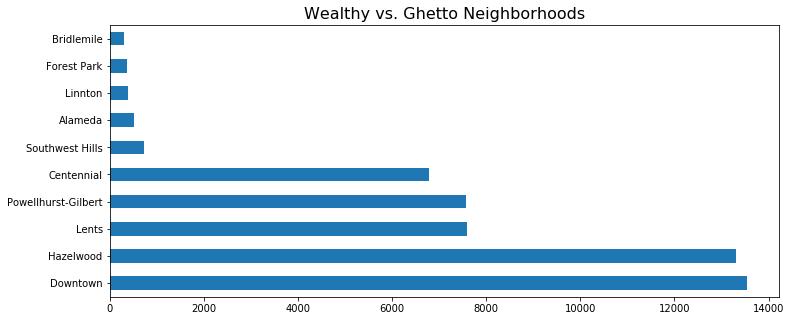

In [59]:
#overall crimes
# Chose rich and poor neighborhoods
rp_neighborhoods = ['Forest Park', 'Alameda', 'Linnton', 'Southwest Hills', 'Bridlemile', 'Downtown', 'Lents', 'Hazelwood', 'Powellhurst-Gilbert', 'Centennial' ]
rn = new_year[new_year['Neighborhood'].isin(rp_neighborhoods)]
rn['Neighborhood'].value_counts().plot.barh(figsize=(12,5))
plt.title('Wealthy vs. Ghetto Neighborhoods', fontsize=16)
plt.show()

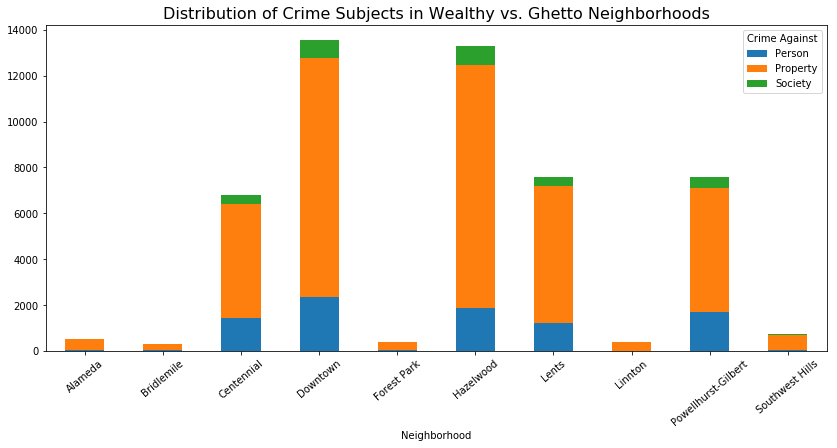

In [30]:
# crime distributions against 3 categorical values
# Using stacked bar chart
my5=rn.groupby(['Neighborhood', 'Crime Against'])['Neighborhood'].count().unstack().fillna(0)
my5.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Distribution of Crime Subjects in Wealthy vs. Ghetto Neighborhoods', fontsize=16)
plt.xticks(rotation=40)
plt.show()

Crime is much more prevalent in poor inner-city neighborhoods than in better off suburbs. As seen before, property crimes make up a large percentage of total crimes. People generally seek to commit theft related property crimes because of the expected personal financial gain. As such, it can be expected that the crime rates will be higher in areas where poverty rates are higher. Moreover, crimes against person and society are also geographically concentrated in these disadvantaged areas of the city. 

Researchers have suggested that the possibility of more lucrative targets in affluent neighborhoods may be offset by the relative risk associated with their acquisition. There are a number of factors that we believe might be behind this, but we need more experiments to know for sure:

  * First, economic segregation means that affluent neighborhoods may be further away.
  
  
  * Second, they are also likely to be more socially connected.
  
  
  * Third, ethnically diverse neighborhoods may be attractive targets because the lack of an overarching social identity provides anonymity for burglars unfamiliar with these norms.
  
    
  
### Most Common Crimes

Next, let's examine the distribution of the 'Offense Category' and 'Offense Type' to see what is the most common crime:

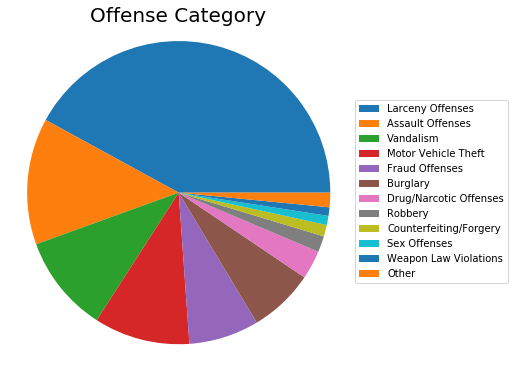

In [31]:
#new_year['Offense Category'].describe()
offenses = []
offenses = pd.DataFrame(offenses, columns=['offense'])
offenses['offense'] = new_year['Offense Category']

# Create numeric counts
assault_counts = pd.DataFrame(offenses.offense.value_counts())
other = int(assault_counts[11:].sum())
assault_counts = assault_counts[:11]
assault_counts.loc['Other'] = other

#Generate Pie Chart
plt.figure(figsize=(6,6))
plt.pie(assault_counts.offense)
plt.axis('equal')
plt.title('Offense Category', fontsize=20)
plt.legend(assault_counts.index, bbox_to_anchor=(1.5, 0.5), loc="center right")
plt.show()

Larceny represents more than 40% of the offense category. Of the larceny offense category, which type is most likely being committed. 

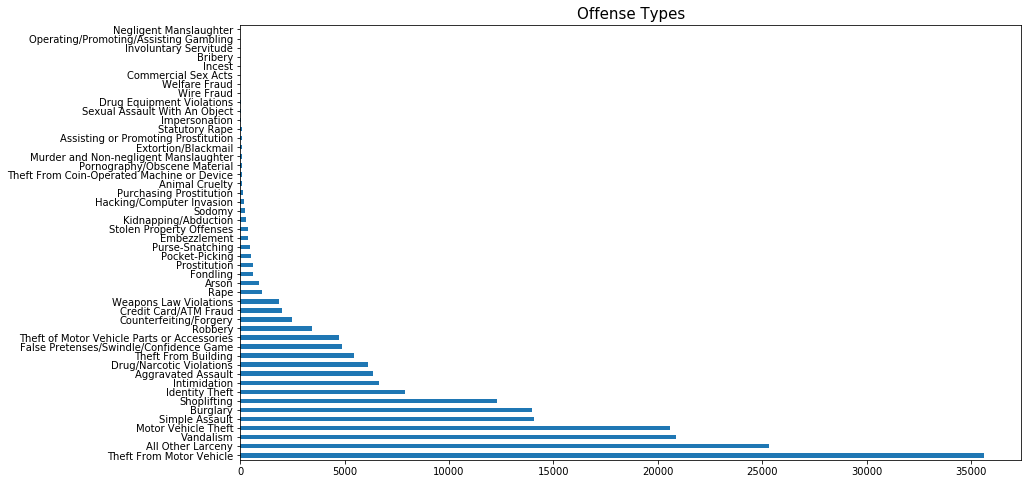

In [32]:
new_year['Offense Type'].value_counts().plot.barh(figsize=(14,8))
plt.title('Offense Types', fontsize=15)
plt.show()

Theft from motor vehicle is the most popular crime. Vehicle theft occurs at all hours of the day and night. We need to be mindful of where we park, remember to lock our cars, and don't leave valuables in plain sight in our vehicles.

Let's examine the trends of all the crimes over 4 years and see if we can extract valuable signals that may hold potential value for future crime prevention.

#### Signal Processing: 

<Figure size 1152x576 with 0 Axes>

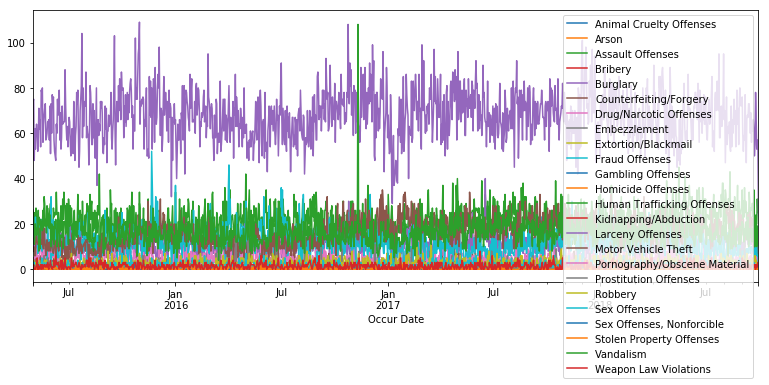

In [56]:
# use rolling mean to look for signal
plt.figure(figsize=(16,8))
pv1 = my2.pivot_table('Month Year', aggfunc=np.size,columns='Offense Category', index=my2.index, fill_value=0)
plo = pv1.rolling(1).sum().plot(figsize=(13, 5))
plt.legend(loc='best')
plt.show()

<Figure size 1152x576 with 0 Axes>

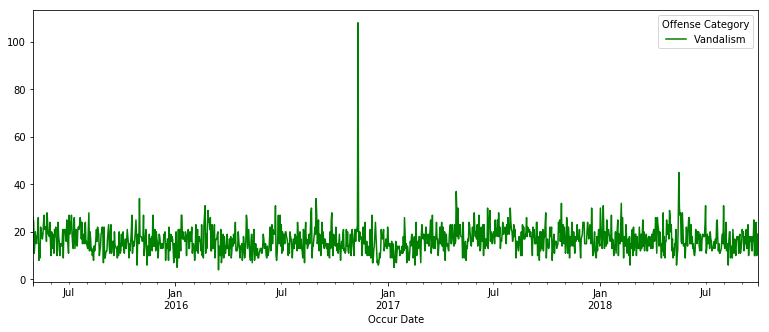

In [53]:
plt.figure(figsize=(16,8))
crime_types = ['Vandalism']
my3 = my2[my2['Offense Category'].isin(crime_types)]
#np.size to calculate the dimension(rows in this case of associated month year')
pv1 = my3.pivot_table('Month Year', aggfunc=np.size,columns='Offense Category', index=my3.index, fill_value=0)
plo = pv1.rolling(1).sum().plot(figsize=(13, 5), c='green')
plt.show()

There is only one peak that stands out from the rest, and it corresponds to the vandalism offense. Digging more into it reveals that back in November 2016, there was a big, three-day riots opposing to the election of Donald Trump as president of the United States, during which a number of businesses were damaged and vandalized. 

#### Motor Vehicle Thefts Analysis:

Nevertheless, property crimes are by far the most reported crimes. And among all the types of property crimes, theft from motor vehicle is the most common crime. 

Next we are going to look at "motor vehicle theft" crime's trend between 2015 - 2018:

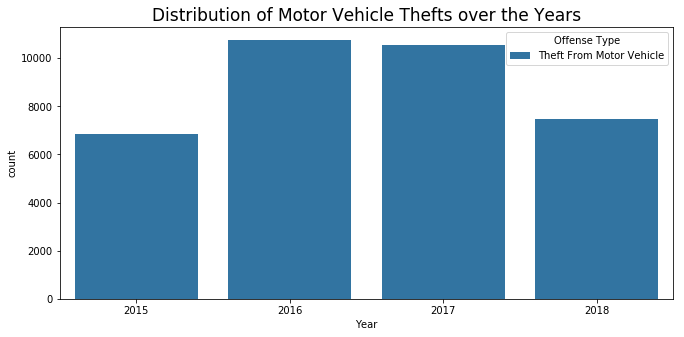

In [36]:
# make a motor theft only df
motor_theft = new_year[new_year['Offense Type'] == 'Theft From Motor Vehicle']

plt.figure(figsize=(11,5))
sns.countplot(x=motor_theft['Year'], hue= motor_theft['Offense Type'], data=motor_theft)
plt.xticks(rotation=0)
plt.title('Distribution of Motor Vehicle Thefts over the Years', fontsize=17)
plt.show()


Motor vehicle thefts increased in 2016 and 2017, but decreased by approximately 30% in 2018. One possible explaination is due the rise of 'smart key' technology, which prevents a car's engine from starting unless it recognizes a computer chip embedded within a key or a keyless start key fob, making cars harder to break into.


(array([735719., 735842., 735964., 736085., 736208., 736330., 736450.,
        736573., 736695., 736815., 736938.]),
 <a list of 11 Text xticklabel objects>)

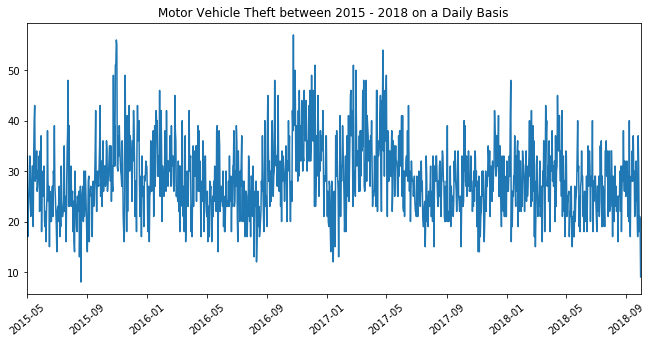

In [50]:
#Group by dates
motor_theft.groupby(motor_theft.index.date)['Number of Records'].count().plot(figsize=(11,5), title='Motor Vehicle Theft between 2015 - 2018 on a Daily Basis')
plt.xticks(rotation=40)

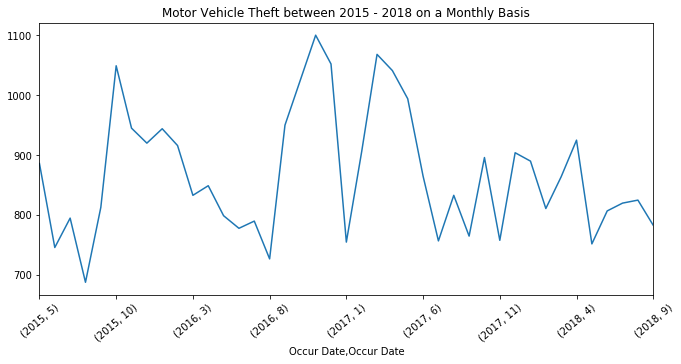

In [51]:
#Group by months
motor_theft.groupby([motor_theft.index.year, motor_theft.index.month])['Number of Records'].count().plot(figsize=(11,5), title='Motor Vehicle Theft between 2015 - 2018 on a Monthly Basis')
plt.xticks(rotation=40)
plt.show() 

There were a few spikes but the overall trend looks flat. If we examine the events happened around some of the spiked days, for example, Oct.31, 2015, which was a Saturday and also Halloween. Children already started going trick-or-treating the night before, young students and professionals attending parties, the streets became more crowded with cars, families, youngsters than normal, creating a good opportunities for car thefts to happen. 

Another spike occured on October 24th, 2016. The day before was the last day of Portland Brewpublic Beer Week. Portlanders love their beer culture, and beer festivals in general are well-received by locals. Granted that people were more likely to take public transportations to attend beer festivals, the sheer amount of attendees contributed to the crowdedness of Portland, allowing more chances for car thievery.

Out of curiousity, let's examine around what time of the day our vehicles are more likely to get stolen: 

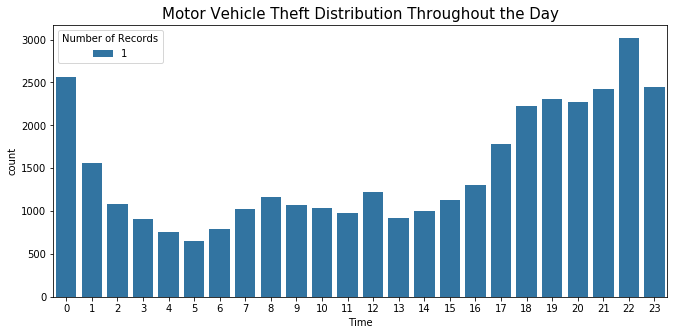

In [45]:
# Motor theft over 24 hrs period
plt.figure(figsize=(11,5))
sns.countplot(motor_theft['Time'], hue=motor_theft['Number of Records'])
plt.title('Motor Vehicle Theft Distribution Throughout the Day', size=15)
plt.show()

Motor theft starts to rise after 1pm, peak at 10pm, and decreases sharply after midnight. We need to be extra watchful of our vehicles between 6pm - 1am. 

Finally, let's take a quick look at how motor vehicle thefts distributed over the days of the week.


Text(0.5, 1.0, 'Motor Theft Distributions by Days of the Weeks')

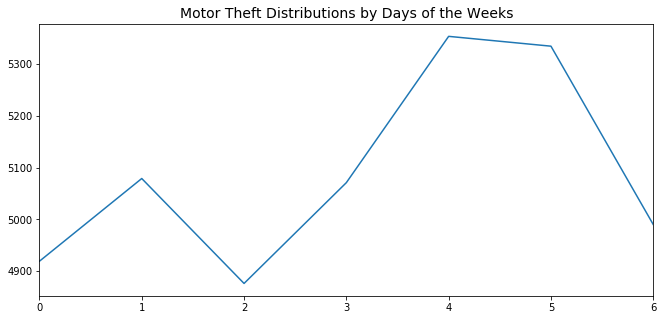

In [46]:
#crime distribution by days of the week
motor_theft['Day'].value_counts().sort_index().plot(figsize=(11,5))
plt.title('Motor Theft Distributions by Days of the Weeks', fontsize=14)


Vehicle thefts spike on Friday, decrease a little bit on Saturday, then dip sharply by Sunday. One possible reason is that people travel more right before the weekend, especially on Friday night, so their cars are more likely to be stolen or broken in on those two days. We need to be extra careful where we park our cars on weekends. 



## Conclusion: 

Portland is a safe city for the most part, but that does not mean we should let your guard down, especially during the hot seasons between May and September, after 6pm, and on weekends. Common sense dictates we should not leave our personal belongings in view in a locked car.

Some areas to be vigilant include: Downtown, Hazelwood, Lents, Powellhurst-Gilbert, Centennial.


## Future Direction:

There are still many problems to address further. For example, I would like to use other federal open sources like Federal Reserve Economic Data (FRED) and American Housing Survey (AHS) to dig deeper into the economic factors and their relations to crime rates; or take a look at the Insurance Institute for Highway Safety (IIHS) to find out the most stolen car model or whether some of the more popular car models like Ford, Toyota, and Subara have similar crime rates.